In [17]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.learning import final_df

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## PCA

In [19]:
# Separating out the features
x = final_df.loc[:, final_df.columns != 'strategy_id'].values
# Separating out the target
y = final_df.loc[:,['strategy_id']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-1.73148133, -1.10565447, -0.90438303, ..., -0.98855611,
         0.98985742,  1.00230453],
       [-1.7303422 , -1.10565447, -0.90438303, ..., -0.98855611,
        -1.01024651, -0.99770077],
       [-1.72920307, -1.10565447, -0.90438303, ...,  1.01157637,
        -1.01024651,  1.00230453],
       ...,
       [ 1.72920307,  2.70215441,  2.06471799, ...,  1.01157637,
        -1.01024651,  1.00230453],
       [ 1.7303422 ,  2.70215441,  2.51008314, ..., -0.98855611,
        -1.01024651, -0.99770077],
       [ 1.73148133,  2.70215441,  4.58845385, ..., -0.98855611,
         0.98985742, -0.99770077]])

In [20]:
principal_components = ['pc 1', 'pc 2']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = principal_components)

In [21]:
finalDf = pd.concat([principalDf, final_df[['strategy_id']]], axis = 1)
finalDf

,pc 1,pc 2,strategy_id
0,-1.568273,1.477115,2
1,-2.060737,-4.541439,2
2,-1.971297,0.528254,2
3,-1.913288,-2.186855,2
4,-2.334186,0.345130,2
...,...,...,...
9118,7.253385,0.674462,0
9119,7.092606,-2.306030,0
9120,2.900356,1.329458,0
9121,3.124431,-2.015805,0


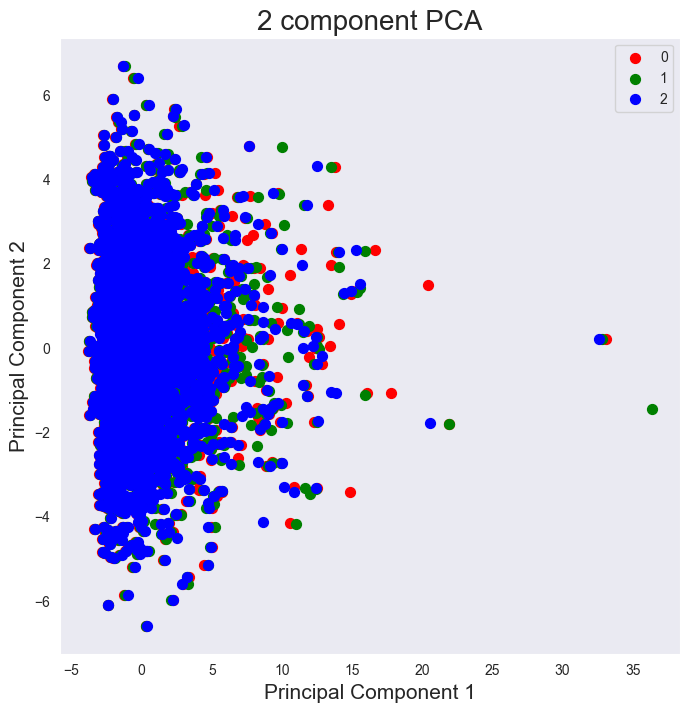

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['strategy_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()